This notebook outlines the sort of information that is available in kiara, which could be included in the codeview and/or rendered notebook.

In [420]:
from rich.syntax import Syntax

from kiara import Kiara
from rich import print as rich_print
import typing

from kiara.utils.jupyter import graph_to_image


def print_all(items):
    for item in items:
        if hasattr(item, "dict"):
            d = item.dict()
            print_dict(d)
        else:
            rich_print(item)

def print_dict(items):

    for k, v in items.items():
        if hasattr(v, "dict"):
            rich_print({k: v.dict()})
        else:
            rich_print({k: v})

kiara = Kiara.instance()

# Module-related information

Kiara modules are Python classes that inherit from the [KiaraModule](https://dharpa.org/kiara/api_reference/kiara.module/#kiara.module.KiaraModule) base class.

A module can only be used when it was instantiated with some configuration (which can be empty), which means that there are 2 ways to look at a module:

- the module class
- an instance of the module class, that was created with module configuration

## The module class

Module class information is static, and contains information about its purpopse (aka documentation), who created it, where it lives, etc.

Here is a list of attributes that can be queried for a module class

### Module id

Technically not really an attribute, but it makes sense to mention it explicitely. This is the name that is used to refer to a module class. In most circumstances it's a namespaced string (using '.' as separators), like:

- 'network.graph.find_shortest_path'
- 'table.import.from_local_file'
- 'language.tokens.remove_stopwords'

There is no hard rule about how those modules should be named, in general it's just advisable to make the purpose of the module (and also maybe the data type it operates on) clear to users without having to read further documentation.

### Module configuration

As was mentioned above, each module instance can be created with a configuration. The module class contains the schema of such configuration, and it can be queried:

In [421]:
module_class = kiara.get_module_class("table.query.sql")
print(module_class._config_cls.schema_json(indent=2))

{
  "title": "QueryTableSQLModuleConfig",
  "description": "Base class that describes the configuration a [``KiaraModule``] class 
accepts.\n\nThis is stored in the ``_config_cls`` class attribute in each ``KiaraModule`` 
class. By default,\nsuch a ``KiaraModule`` is not configurable.\n\nThere are two config 
options every ``KiaraModule`` supports:\n\n - ``constants``, and\n - ``defaults``\n\n 
Constants are pre-set inputs, and users can't change them and an error is thrown if they try.
Defaults are default\n values that override the schema defaults, and those can be overwritten
by users. If both a constant and a default\n value is set for an input field, an error is 
thrown.",
  "type": "object",
  "properties": {
    "constants": {
      "title": "Constants",
      "description": "Value constants for this module.",
      "type": "object"
    },
    "defaults": {
      "title": "Defaults",
      "description": "Value defaults for this module.",
      "type": "object"
    },
    "query": {
      "title": "Query",
      "description": "The query to execute. If not specified, the user will be able to 
provide their own.",
      "type": "string"
    },
    "relation_name": {
      "title": "Relation Name",
      "description": "The name the table is referred to in the sql query. If not specified, 
the user will be able to provide their own.",
      "type": "string"
    }
  },
  "additionalProperties": false
}

### Module type documentation

This can be considered 2 different things, even though the first one is included in the 2nd.

#### Module description

A single sentence that describes the module purpose.

In [422]:
import_file_module = kiara.get_module_class("table.import.from_local_file")

import_file_module_type_metadta = import_file_module.get_type_metadata()
rich_print(import_file_module_type_metadta.documentation.description)

Import a supported file and create a table from it.

#### Module documentation

One or several paragraphs of markdown text that describe in detail (hopefully) what the module does, and how it does those things. The 'Module description' is included in this text, as the first paragraph.

In [423]:
rich_print(import_file_module_type_metadta.documentation.full_doc)

Import a supported file and create a table from it.

Currently, only csv files are supported.

#### Origin

Mostly, this is authorship information. But could potentially also include things like copyright, etc.

In [424]:
print_all(import_file_module_type_metadta.origin.authors)

{'name': 'Markus Binsteiner'}

{'email': 'markus@frkl.io'}

#### Context

This describes the context the module lives in (like Python package, git repo, etc.), and some of the properties that help distinguish/filter it from the other modules that live in the same place.

##### Tags

Tags here are keywords that are associated with some of the modules properties.

In [425]:
module_type_context = import_file_module_type_metadta.context
rich_print(module_type_context.tags)

{'pipeline', 'import', 'onboarding', 'core'}

##### Labels

Labels are similar to tags, but are in a key/value pair form. This makes it easier to query for certain aspects that modules share (like whether they are a pipline-type module, or not).

In [426]:
rich_print(module_type_context.labels)

{'package': 'kiara_modules.core', 'pipeline': 'yes'}

##### References

The 'references' value in the context is a free form key-/value pair dictionary (similar to labels), that contain links to urls that are relevant to or important for the module.

In [427]:
print_dict(module_type_context.references)

{
    'source_repo': {
        'url': AnyUrl('https://github.com/DHARPA-Project/kiara_modules.core', scheme='https',
host='github.com', tld='com', host_type='domain', path='/DHARPA-Project/kiara_modules.core'),
        'desc': 'The module package git repository.'
    }
}

{
    'documentation': {
        'url': AnyUrl('https://dharpa.org/kiara_modules.core/', scheme='https', 
host='dharpa.org', tld='org', host_type='domain', path='/kiara_modules.core/'),
        'desc': 'The url for the module package documentation.'
    }
}

{
    'module_doc': {
        'url': AnyUrl('https://dharpa.org/kiara_modules.core/pipelines_list.html#tableimportf
rom_local_file', scheme='https', host='dharpa.org', tld='org', host_type='domain', 
path='/kiara_modules.core/pipelines_list.html', fragment='tableimportfrom_local_file'),
        'desc': 'A link to the published, auto-generated module documentation.'
    }
}

#### Python class

This section contains information about the underlying Python class of the module. If the module is assembled from a pipeline description, *kiara* dyanmically creates a Python class for it, so you might or might not find the Python class in the source files, depending on that. In the following, you wouldn't, for example.

In [428]:
import_file_module_type_metadta.python_class

 class_name    TableImportFromLocalFilePipelineModule                            
  module_name   kiara_modules.core.import                                         
  full_name     kiara_modules.core.import.TableImportFromLocalFilePipelineModule

#### Pipeline config / Source code

Depending on whether the module is a pipeline module, or not, this section will differ.

##### Pipeline config

In the case of a pipeline, you'll the the configuration that was used to produce it.


In [429]:
rich_print(import_file_module_type_metadta.pipeline_config.dict())

{
    'constants': {},
    'defaults': {},
    'steps': [
        {
            'module_type': 'import.local_file',
            'module_config': {},
            'step_id': 'read_file',
            'input_links': {}
        },
        {
            'module_type': 'table.create.from_file',
            'module_config': {},
            'step_id': 'create_table_from_file',
            'input_links': {
                'file': [{'step_id': 'read_file', 'value_name': 'file', 'sub_value': None}]
            }
        },
        {
            'module_type': 'value.save',
            'module_config': {'value_type': 'table'},
            'step_id': 'save_table',
            'input_links': {
                'value_item': [
                    {
                        'step_id': 'create_table_from_file',
                        'value_name': 'table',
                        'sub_value': None
                    }
                ]
            }
        }
    ],
    'input_aliases': {
        'read_file__path': 'path',
        'read_file__aliases': 'file_aliases',
        'save_table__aliases': 'aliases'
    },
    'output_aliases': {
        'create_table_from_file__table': 'table',
        'save_table__value_id': 'value_id'
    },
    'documentation': 'Import a supported file and create a table from it.\n\nCurrently, only 
csv files are supported.\n',
    'context': {},
    'module_type_name': 'from_local_file'
}

##### Source code

And for Python modules, you can display the source code of the ``process`` method (which is the one where the important stuff happens).

In [430]:
sql_query_model = kiara.get_module_class("table.query.sql")
print(Syntax(sql_query_model.get_type_metadata().process_src, "python"))

def process(self, inputs: ValueSet, outputs: ValueSet) -> None:                              
                                                                                             
    import duckdb                                                                            
                                                                                             
    _relation_name: str = inputs.get_value_data("relation_name")                             
    if _relation_name.upper() in RESERVED_SQL_KEYWORDS:                                      
        raise KiaraProcessingException(                                                      
            f"Invalid relation name '{_relation_name}': this is a reserved sql keyword, pleas
        )                                                                                    
                                                                                             
    _table = inputs.get_value_data("table")                                                  
    _query = inputs.get_value_data("query")                                                  
                                                                                             
    relation: duckdb.DuckDBPyRelation = duckdb.arrow(_table)                                 
    result: duckdb.DuckDBPyResult = relation.query(_relation_name, _query)                   
                                                                                             
    outputs.set_value("query_result", result.arrow())                                        
                                                                                             

### Module instance documentation

If we created a module instance from a module class, we have additional information available, mostly in regards to the runtime behaviour of our module.

**Important to note**: the same module type can have different inputs/outputs or runtime behaviour, if it is instantiated with different configuration values.

#### Configuration

The configuration that was used to create this instance.

Here is the output of the 's use the `table.query.sql` module config attribute, when instantiated without configuration:

In [431]:
sql_query_no_config = kiara.create_module("table.query.sql")
rich_print(sql_query_no_config.config.dict())

{'constants': {}, 'defaults': {}, 'query': None, 'relation_name': None}

And here if create with non-empty config:

In [432]:
sql_query_config = kiara.create_module("table.query.sql", module_config={"query": "select * from data_item", "relation_name": "dta_item"})
rich_print(sql_query_config.config.dict())

{
    'constants': {},
    'defaults': {},
    'query': 'select * from data_item',
    'relation_name': 'dta_item'
}

#### Input schema

Each module instance has an individual set of inputs it accepts. Some of those inputs can be optional. The schema also includes a description of the input itself.

Again, lets compare the config/no-config instances. First, the no config:

In [433]:
print_dict(sql_query_no_config.input_schemas)

{
    'table': {
        'type': 'table',
        'type_config': {},
        'default': '__not_set__',
        'optional': False,
        'doc': 'The table to query'
    }
}

{
    'query': {
        'type': 'string',
        'type_config': {},
        'default': '__not_set__',
        'optional': False,
        'doc': 'The query.'
    }
}

{
    'relation_name': {
        'type': 'string',
        'type_config': {},
        'default': 'data',
        'optional': False,
        'doc': 'The name the table is referred to in the sql query.'
    }
}

And now the one with config. You'll see it has less inputs the user can set. This is because we 'hardcoded' the query we want to execute in the module configuration. So all that is left for the user to provide is the actual table.

In [434]:
print_dict(sql_query_config.input_schemas)

{
    'table': {
        'type': 'table',
        'type_config': {},
        'default': '__not_set__',
        'optional': False,
        'doc': 'The table to query'
    }
}

#### Output schema

Same as with inputs, each module instance has a set of outputs. In our sql-query example, both module instances have the same output schema, but it is certainly possible for two modules of the same type to have different output schemas.

In [435]:
print_dict(sql_query_no_config.output_schemas)

{
    'query_result': {
        'type': 'table',
        'type_config': {},
        'default': '__not_set__',
        'optional': False,
        'doc': 'The query result.'
    }
}

# Pipeline related information

A pipeline is basically just a set of modules that were connected in some way (more accurately: some inputs of some modules where connected to some outputs of some other modules). Each workflow is also a pipeline. If it only consists of a single module, it is a pipeline with only one step.

## Execution graph

The most immediately useful information about a workflow/pipeline is how the modules are connected. We can get this information with the exection graph.

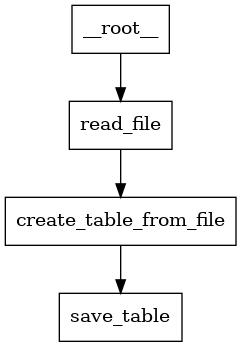

In [436]:
workflow = kiara.create_workflow("table.import.from_local_file")
workflow_inputs = {
    "path": "/home/markus/projects/dharpa/kiara/examples/data/journals/JournalNodes1902.csv",
    "aliases": ["example_alias"]
}
workflow.inputs.set_values(**workflow_inputs)

pipeline = workflow.pipeline

graph_to_image(pipeline.structure.execution_graph)

## Data-flow graph

A more detailed connection of how the inputs and outputs are connected can be had from the data-flow-graph.

There is a simple version:

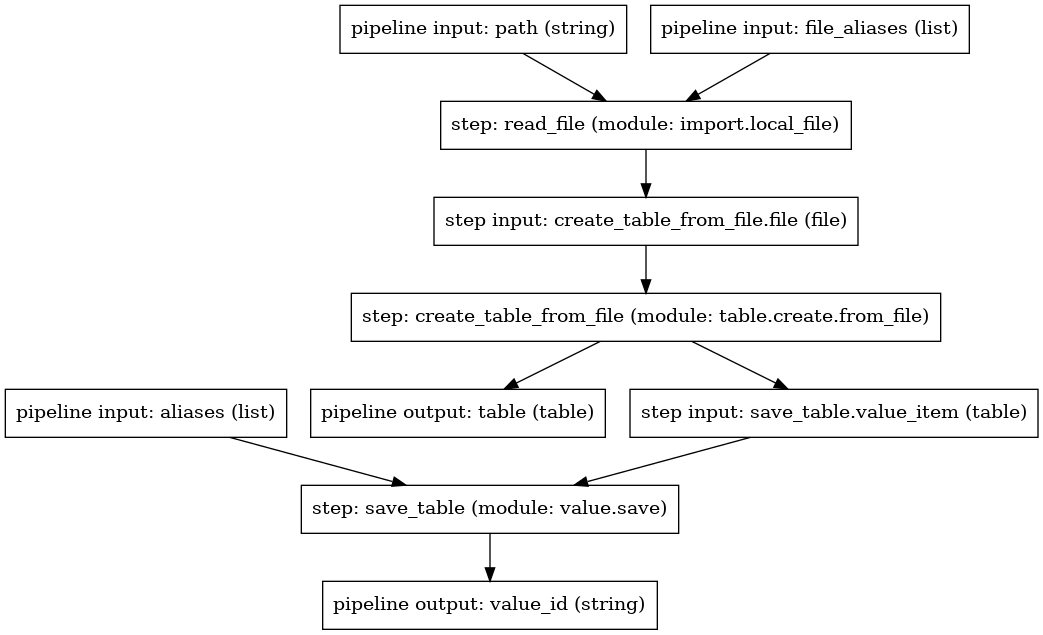

In [437]:
graph_to_image(pipeline.structure.data_flow_graph_simple)

And a more complete one:

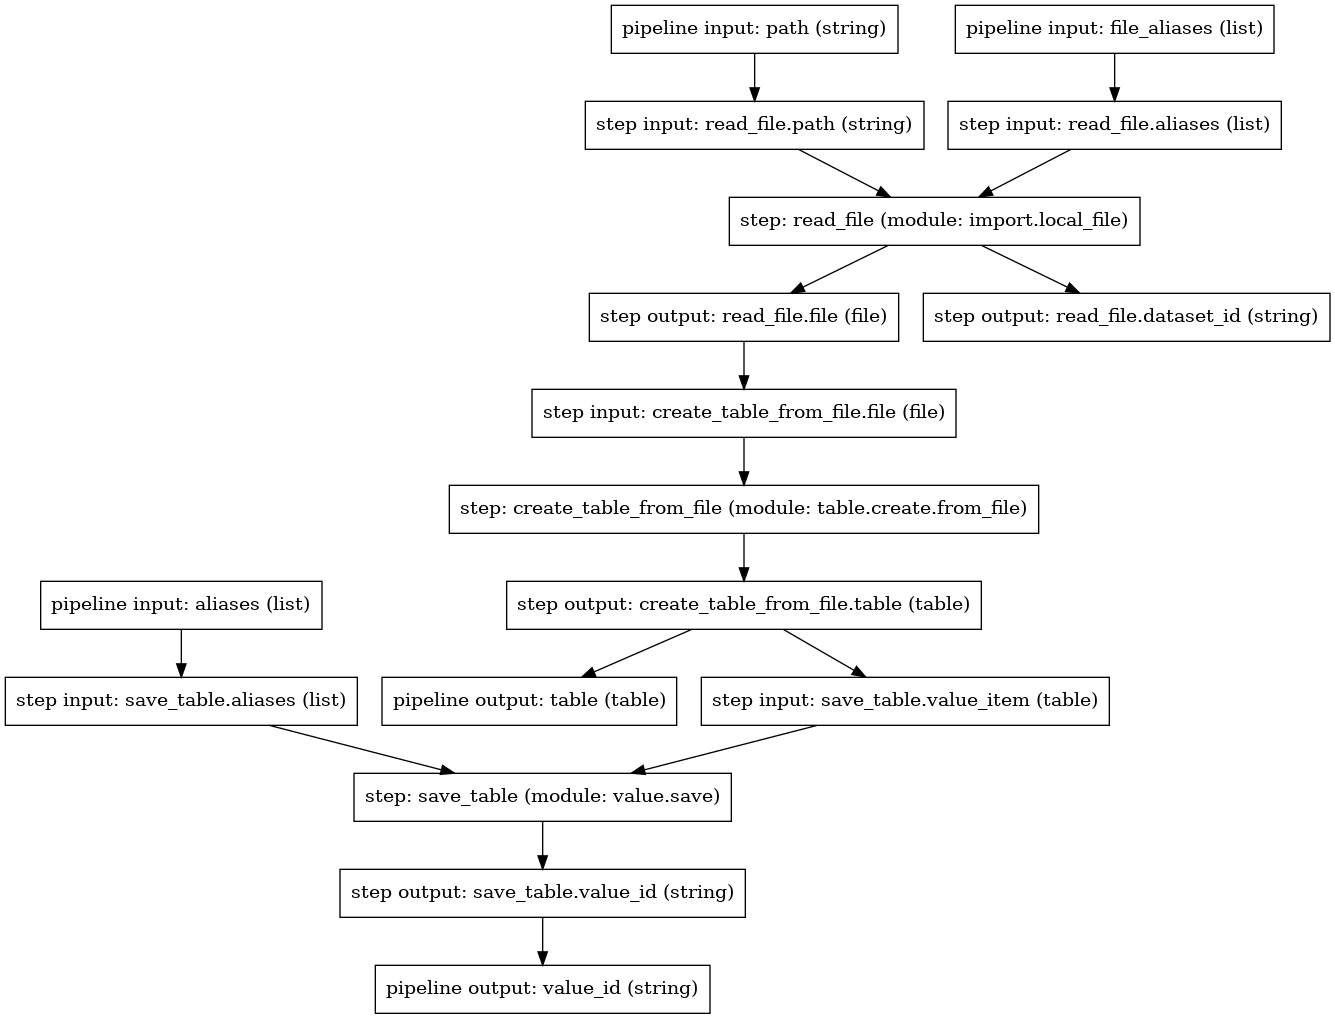

In [438]:
graph_to_image(pipeline.structure.data_flow_graph)

## Inputs / Outputs

Similar to module instances, a pipeline also has inputs and outputs.

### Pipeline inputs

Unlike module instances, a pipeline contains state. Which means that in addition to the name and schema of each input, it also contains the current state of that input. For example, here we can see that both the 'path' and 'aliases' inputs are set, but 'file_aliases' is not.

In [439]:
print_dict(pipeline.inputs)

{
    'path': {
        'id': '0cf047f7-759d-4c2f-b6f0-f89ba048b075',
        'value_schema': {
            'type': 'string',
            'type_config': {},
            'default': '__not_set__',
            'optional': False,
            'doc': 'The path to the file.'
        },
        'is_constant': False,
        'last_update': datetime.datetime(2021, 7, 27, 16, 46, 43, 866173),
        'is_streaming': False,
        'is_set': True,
        'is_none': False,
        'value_metadata': {
            'origin': '<kiara.pipeline.structure.PipelineStructure object at 
0x7fb5980e9490>.inputs.path'
        },
        'metadata': {},
        'value_fields': (
            {
                'value_name': 'path',
                'value_schema': {
                    'type': 'string',
                    'type_config': {},
                    'default': '__not_set__',
                    'optional': False,
                    'doc': 'The path to the file.'
                },
                'pipeline_id': 'table.import.from_local_file_9',
                'connected_inputs': [
                    {'step_id': 'read_file', 'value_name': 'path', 'sub_value': None}
                ],
                'is_constant': False
            },
        )
    }
}

{
    'file_aliases': {
        'id': '7dfbfe92-3454-4035-b627-624085a1f1c6',
        'value_schema': {
            'type': 'list',
            'type_config': {},
            'default': '__not_set__',
            'optional': True,
            'doc': 'A list of aliases to give the dataset in the internal data store.'
        },
        'is_constant': False,
        'last_update': datetime.datetime(2021, 7, 27, 16, 46, 43, 866439),
        'is_streaming': False,
        'is_set': False,
        'is_none': True,
        'value_metadata': {
            'origin': '<kiara.pipeline.structure.PipelineStructure object at 
0x7fb5980e9490>.inputs.file_aliases'
        },
        'metadata': {},
        'value_fields': (
            {
                'value_name': 'file_aliases',
                'value_schema': {
                    'type': 'list',
                    'type_config': {},
                    'default': '__not_set__',
                    'optional': True,
                    'doc': 'A list of aliases to give the dataset in the internal data 
store.'
                },
                'pipeline_id': 'table.import.from_local_file_9',
                'connected_inputs': [
                    {'step_id': 'read_file', 'value_name': 'aliases', 'sub_value': None}
                ],
                'is_constant': False
            },
        )
    }
}

{
    'aliases': {
        'id': 'a9dc27ab-7afd-4cfa-8031-52aca45ed8cf',
        'value_schema': {
            'type': 'list',
            'type_config': {},
            'default': '__not_set__',
            'optional': True,
            'doc': 'A list of aliases to link to the saved value id.'
        },
        'is_constant': False,
        'last_update': datetime.datetime(2021, 7, 27, 16, 46, 43, 867012),
        'is_streaming': False,
        'is_set': True,
        'is_none': False,
        'value_metadata': {
            'origin': '<kiara.pipeline.structure.PipelineStructure object at 
0x7fb5980e9490>.inputs.aliases'
        },
        'metadata': {},
        'value_fields': (
            {
                'value_name': 'aliases',
                'value_schema': {
                    'type': 'list',
                    'type_config': {},
                    'default': '__not_set__',
                    'optional': True,
                    'doc': 'A list of aliases to link to the saved value id.'
                },
                'pipeline_id': 'table.import.from_local_file_9',
                'connected_inputs': [
                    {'step_id': 'save_table', 'value_name': 'aliases', 'sub_value': None}
                ],
                'is_constant': False
            },
        )
    }
}

### Pipeline outputs

Similar to the inputs, we can investigate the schema and state of our pipeline outputs.

In [440]:
print_dict(pipeline.outputs)

{
    'table': {
        'id': '36cbeb88-0e01-45fe-b117-5398a5493e12',
        'value_schema': {
            'type': 'table',
            'type_config': {},
            'default': '__not_set__',
            'optional': False,
            'doc': 'The imported table.'
        },
        'is_constant': False,
        'last_update': datetime.datetime(2021, 7, 27, 16, 46, 43, 865829),
        'is_streaming': False,
        'is_set': True,
        'is_none': False,
        'value_metadata': {
            'origin': 
'table.import.from_local_file_9.steps.create_table_from_file.outputs.table'
        },
        'metadata': {},
        'value_fields': (
            {
                'value_name': 'table',
                'value_schema': {
                    'type': 'table',
                    'type_config': {},
                    'default': '__not_set__',
                    'optional': False,
                    'doc': 'The imported table.'
                },
                'pipeline_id': 'table.import.from_local_file_9',
                'connected_output': {
                    'step_id': 'create_table_from_file',
                    'value_name': 'table',
                    'sub_value': None
                }
            },
        ),
        'links': {'e67f4d7a-8a51-48c6-8073-770946f53ba1': {}}
    }
}

{
    'value_id': {
        'id': '838a4dbc-c59c-4ae2-9bee-8dc1da9d74fb',
        'value_schema': {
            'type': 'string',
            'type_config': {},
            'default': '__not_set__',
            'optional': False,
            'doc': 'The id of the saved table data-item.'
        },
        'is_constant': False,
        'last_update': datetime.datetime(2021, 7, 27, 16, 46, 43, 866035),
        'is_streaming': False,
        'is_set': True,
        'is_none': False,
        'value_metadata': {
            'origin': 'table.import.from_local_file_9.steps.save_table.outputs.value_id'
        },
        'metadata': {},
        'value_fields': (
            {
                'value_name': 'value_id',
                'value_schema': {
                    'type': 'string',
                    'type_config': {},
                    'default': '__not_set__',
                    'optional': False,
                    'doc': 'The id of the saved table data-item.'
                },
                'pipeline_id': 'table.import.from_local_file_9',
                'connected_output': {
                    'step_id': 'save_table',
                    'value_name': 'value_id',
                    'sub_value': None
                }
            },
        ),
        'links': {'54e5e498-595e-4fc3-bb55-fe528bea07ae': {}}
    }
}

### Pipeline input and result data

In addition to the output schema and state, we can of course also get the output data. Which is the whole point of a workflow, right? We could do the same with the inputs, but we set those ourselves, so it's not immediately interesting, and I decided to skip that.

In [441]:
print_dict(pipeline.outputs.get_all_value_data())


{
    'table': pyarrow.Table
Id: int64
Label: string
JournalType: string
City: string
CountryNetworkTime: string
PresentDayCountry: string
Latitude: double
Longitude: double
Language: string
}

{'value_id': 'aad1d5a3-fed5-4828-b5e7-6a28cb057db7'}

### Pipeline state

Last not least, if we are interested in more detailed what happened when we were executing the workflow, we can print out the current state of steps of the pipeline/workflow. I'll only print out a human-readable version, but of course this would also be available as data (e.g. in json format).

In [442]:
rich_print(workflow.current_state)


Pipeline state for: table.import.from_local_file_9

Status: RESULTS_READY

Inputs / Outputs
                                                                                             
  ╭─ Inputs ──────────────────────────────────────────────────────────────────────────────╮  
  │                                                                                       │  
  │   Field name     Type     Description              Required      Status       Ready   │  
  │  ───────────────────────────────────────────────────────────────────────────────────  │  
  │   path           string   The path to the file.    yes          -- set --      yes    │  
  │   file_aliases   list     A list of aliases to     no         -- not set --    yes    │  
  │                           give the dataset in                                         │  
  │                           the internal data                                           │  
  │                           store.                                                      │  
  │   aliases        list     A list of aliases to     no           -- set --      yes    │  
  │                           link to the saved                                           │  
  │                           value id.                                                   │  
  │                                                                                       │  
  ╰───────────────────────────────────────────────────────────────────────────────────────╯  
  ╭─ Outputs ─────────────────────────────────────────────────────────────────────────────╮  
  │                                                                                       │  
  │   Field name   Type     Description                    Required    Status     Ready   │  
  │  ───────────────────────────────────────────────────────────────────────────────────  │  
  │   table        table    The imported table.            yes        -- set --    yes    │  
  │   value_id     string   The id of the saved table      yes        -- set --    yes    │  
  │                         data-item.                                                    │  
  │                                                                                       │  
  ╰───────────────────────────────────────────────────────────────────────────────────────╯  
                                                                                             
Steps
                                                                                             
  ╭─ Processing stage: 1 ─────────────────────────────────────────────────────────────────╮  
  │                                                                                       │  
  │   step_id:      read_file                                                             │  
  │  ──────────────────────────────────────────────────────────────────────────           │  
  │   type          ]8;id=1627397204.4984233-587884;https://dharpa.org/kiara_modules.core/\import.local_file]8;;\                                                     │  
  │   status        RESULTS_READY                                                         │  
  │   required      yes                                                                   │  
  │   is pipeline   no                                                                    │  
  │   inputs        path (type: string)        -- set --                                  │  
  │                 aliases (type: list)       -- not set (not required) --               │  
  │   outputs       file (type: file)          -- set --                                  │  
  │                 dataset_id (type: string)  -- set --                                  │  
  │                                                                                       │  
  ╰───────────────────────────────────────────────────────────────────────────────────────╯  
  ╭─ Processing stage: 2 ─────────────────────────────────────